In [1]:
import numpy as np
from scipy.special import comb
from matplotlib import pyplot as plt

In [2]:
#Метод Гаусса решения СЛАУ
def gaussian_elimin(A, b):   
    x_k = []
    a_k = []
   
    for k in range(len(A)):
        A[k].append(b[k])

#--------------------------------------------------------------------------
    #Прямой ход метода Гаусса
    for t in range(len(A)-1):
        num_null = 0
        for i in range(len(A)-t-1):          
            if (A[t][t] == 0) and (A[t+1+i][t] != 0):
                temp = A[t+1+i].copy()
                A[t+1+i] = A[t].copy()
                A[t] = temp
                num_null+=1
                
                if (num_null == len(A)-1-t):
                    break
                    
                continue
            
            elif (A[t][t] == 0) and (A[t+1+i][t] == 0):
                num_null+=1
                    
                if (num_null == len(A)-1-t):
                    print("Ошибка! Определитель равен нулю!")
                    break
                      
                continue
               
            a_k = A[t+1+i][t]
            for j in range(len(A[0])-t):
                A[i+1+t][t+j] -= A[t][t+j]*(a_k/A[t][t]) 
#--------------------------------------------------------------------------
                
    #Обратный ход метода Гаусса
    temp = 0
    for i in range(len(A)):
        x_i = (A[len(A)-1-i][len(A)]-temp)/A[len(A)-1-i][len(A)-1-i] 
        x_k.insert(0, x_i)
        
        temp = 0
        for j in range(len(x_k)):
            temp += x_k[len(x_k)-1-j] * A[len(A)-i-2][len(A)-j-1] 
                                        
    return x_k

## Часть №1: Квадратурные формулы Ньютона-Котса и Гаусса

In [3]:
#Начальные данные
a = 1.5
b = 2.3
alpha = 0.2
beta = 0
k = 10
exact_value1 = 25.0102144178
exact_value2 = 32.2195145288

In [4]:
#Рассматриваемая функция
def func(x):
    f_x = 2*np.cos(3.5*x)*np.exp(5*x/3)+3*np.sin(1.5*x)*np.exp(-4*x)+3
    return f_x  

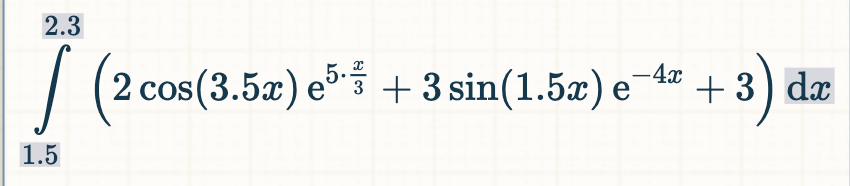

In [5]:
#Абсолютная погрешность 
def err_rate(exact, approx):
    ans = abs(exact - approx)
    return ans

In [6]:
#Квадратурная формула средних прямоугольников 
def midpoint_rule(n):
    sum = 0
    h = (b-a)/n
    for i in range(1, n+1):
        sum+=func(a+(i-1/2)*h)
    sum*=h
    
    return sum

In [7]:
midpoint_rule(200)

25.010508642876882

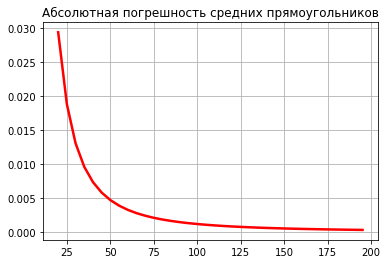

0.00029422507688181554

In [8]:
#Построение графика абсолютной погрешности средних прямоугольников
n_k = []
err_k = []
for i in range(20, 200, 5):
    n_k.append(i)
    err_k.append(err_rate(exact_value1, midpoint_rule(i)))

plt.title('Абсолютная погрешность средних прямоугольников')
plt.plot(n_k, err_k, 'red', linewidth=2.5)
plt.grid()
plt.show()

err_rate(exact_value1, midpoint_rule(200))

In [9]:
#Квадратурная формула левых прямоугольников 
def left_rule(n):
    sum = 0
    h = (b-a)/n
    for i in range(0, n):
        sum+=func(a+i*h)
    sum*=h
    
    return sum

In [10]:
left_rule(200)

25.070597028705464

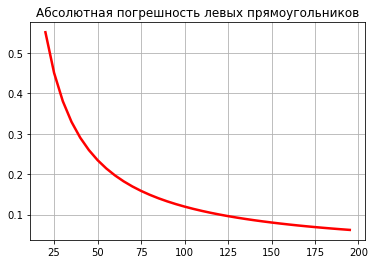

0.06038261090546371

In [11]:
#Построение графика абсолютной погрешности левых прямоугольников
n_k = []
err_k = []
for i in range(20, 200, 5):
    n_k.append(i)
    err_k.append(err_rate(exact_value1, left_rule(i)))

plt.title('Абсолютная погрешность левых прямоугольников')
plt.plot(n_k, err_k, 'red', linewidth=2.5)
plt.grid()
plt.show()

err_rate(exact_value1, left_rule(200))

In [12]:
#Квадратурная формула трапеции
def trap_rule(n):
    sum = (func(a)+func(b))/2
    h = (b-a)/n
    for i in range(1, n):
        sum+=func(a+i*h)
    sum*=h
    
    return sum

In [13]:
trap_rule(200)

25.009625968536014

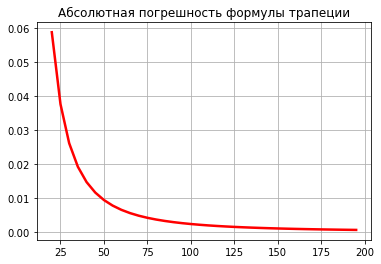

0.0005884492639864902

In [14]:
#Построение графика абсолютной погрешности формулы трапеции
n_k = []
err_k = []
for i in range(20, 200, 5):
    n_k.append(i)
    err_k.append(err_rate(exact_value1, trap_rule(i)))

plt.title('Абсолютная погрешность формулы трапеции')
plt.plot(n_k, err_k, 'red', linewidth=2.5)
plt.grid()
plt.show()

err_rate(exact_value1, trap_rule(200))

In [15]:
#Квадратурная формула Симпсона
def simp_rule(n):
    sum = 0
    h = (b-a)/n
    for i in range(1, n+1):
        sum+=func(a+(i-1)*h)+4*func(a+(i-1/2)*h)+func(a+i*h)
    sum*=h/6
    
    return sum

In [16]:
simp_rule(200)

25.010214418096574

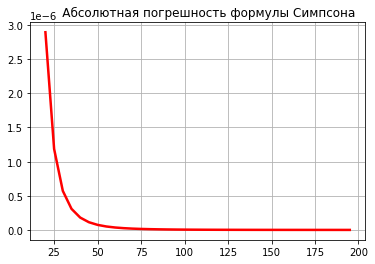

2.965734324789082e-10

In [17]:
#Построение графика абсолютной погрешности формулы Симпсона
n_k = []
err_k = []
for i in range(20, 200, 5):
    n_k.append(i)
    err_k.append(err_rate(exact_value1, simp_rule(i)))

plt.title('      Абсолютная погрешность формулы Симпсона')
plt.plot(n_k, err_k, 'red', linewidth=2.5)
plt.grid()
plt.show()

err_rate(exact_value1, simp_rule(200))

## Метод Ньютона-Котса

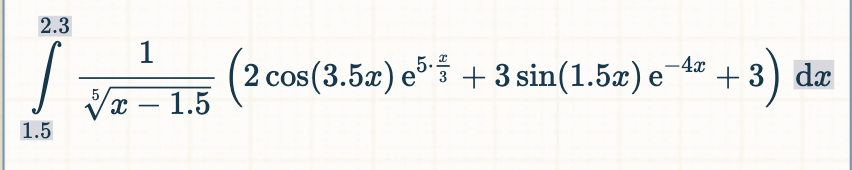

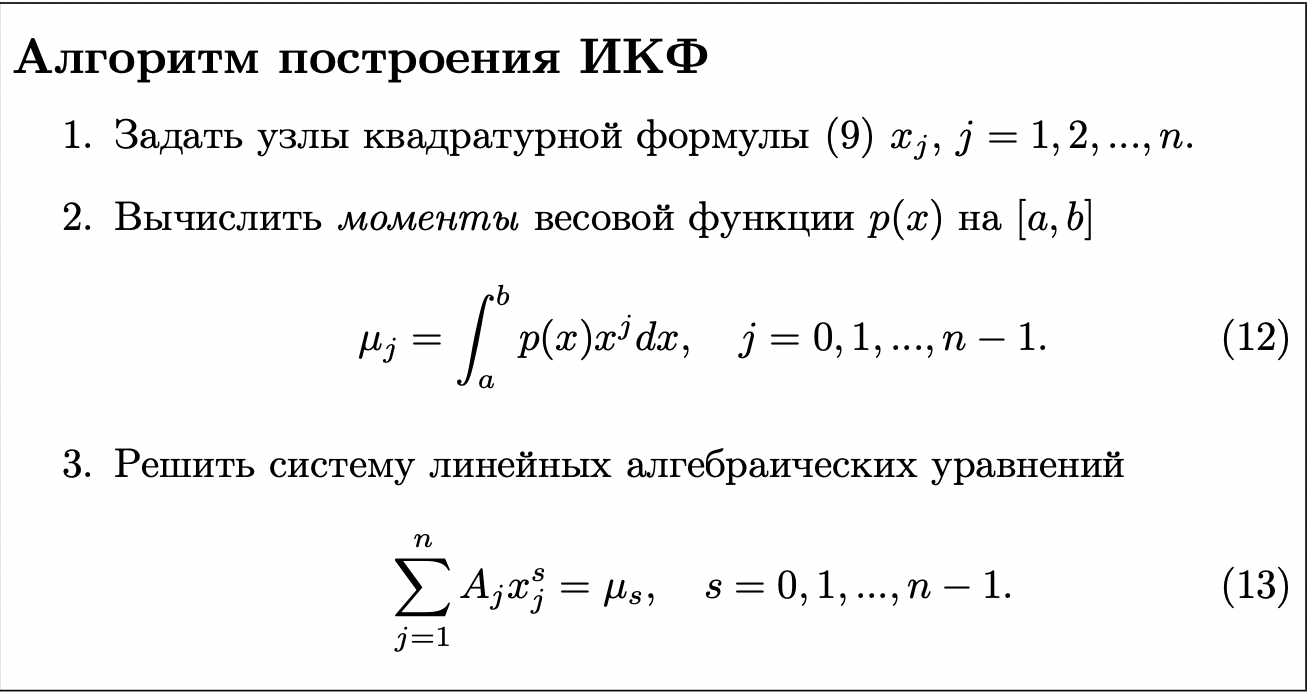

In [18]:
#Нахождение моментов весовой функции
def moments(z0, z1, a, alpha, n):
    def integrate(x):
        sum = 0
        for j in range(n+1):
            sum+=comb(n,j)*(x-a)**(n+1-j-alpha)*a**(j)/(n+1-j-alpha)
        return sum
    ans = integrate(z1) - integrate(z0)
    return ans


In [19]:
#Определение коэффициентов квадратурной формулы
def coeffs(z0, z1, z10, moments, n):
    M = moments   
    #формируем матрицу x_s
    x_s = []
    for i in range(0, n):
        x_s.append([])
        x_s[i].append(z0**i)
        x_s[i].append(z10**i)
        x_s[i].append(z1**i)

    A = gaussian_elimin(x_s, M) 
    return A

In [20]:
#Метод Ньютона-Котса
def newton_cotes(a, b, alpha, k, n):
    h = (b-a)/k
    ans = 0
    for i in range(1, k+1):
        #Узлы квадратурной формулы
        z1 = a+i*h
        z0 = a+(i-1)*h
        z10 = (z1+z0)/2
        
        #Находим моменты весовой функции
        M = []
        for j in range(0, n):
            M.append(moments(z0, z1, a, alpha, j))
                        
        A = coeffs(z0, z1, z10, M, n)        
        ans+=A[0]*func(z0)+A[1]*func(z10)+A[2]*func(z1) 
        
    return ans

In [21]:
newton_cotes(a, b, alpha, 10, 3)

32.21968250656839

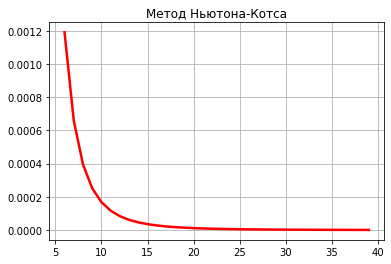

1.8564776382845594e-09

In [22]:
#Построение графика абсолютной погрешности метода Ньютона-Котса
n_k = []
err_k = []
for i in range(6, 40, 1):
    n_k.append(i)
    err_k.append(err_rate(exact_value2, newton_cotes(a, b, alpha, i, 3)))

plt.title('Метод Ньютона-Котса')
plt.plot(n_k, err_k, 'red', linewidth=2.5)
plt.grid()
plt.show()

err_rate(exact_value2, newton_cotes(a, b, alpha, 200, 3))

## Метод Гаусса

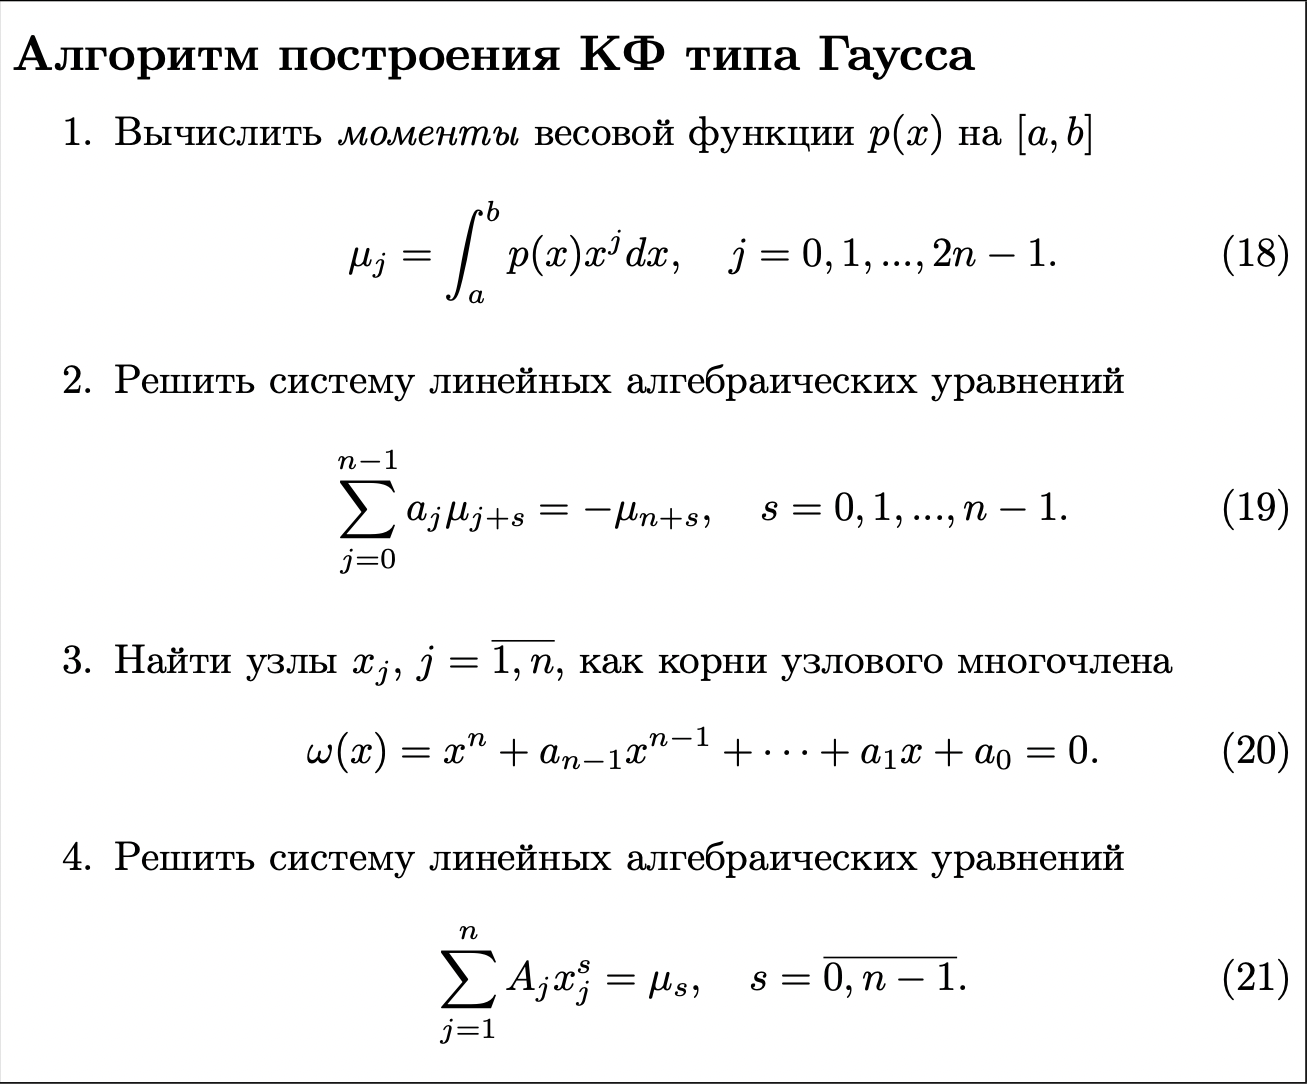

In [23]:
#Формула Кардано
def cardano_formula(a_j):
    x_j = []
    a = 1
    b = a_j[-1]
    c = a_j[-2]
    d = a_j[-3]
    q = 0.5*(2*b**3/(27*a**3)-b*c/(3*a**2)+d/a)
    p = 1/3*((3*a*c-b**2)/(3*a**2))
    
#     if q**2 + p**3 < 0 and p < 0:
#         print("true")
#     else:
#         print("false")
        
    r = np.sign(q)*np.sqrt(np.abs(p))
    phi = np.arccos(q/r**3)
    
    y1 = -2*r*np.cos(phi/3)
    y2 = 2*r*np.cos(np.pi/3-phi/3)
    y3 = 2*r*np.cos(np.pi/3+phi/3)
    
    x_j.append(y1-b/(3*a))
    x_j.append(y2-b/(3*a))
    x_j.append(y3-b/(3*a))
        
    return x_j

In [24]:
#Ищем коэффициенты a_j узлового многочлена
def find_a(moments, n):
    b = moments[n:]
    A = []
    a_j = []
    #Формируем матрицу слева
    for i in range(0, n):
        A.append([])
        A[i] = moments[i:n+i]
    
    for j in range(len(b)):
        b[j] = -b[j]
        
    a_j = gaussian_elimin(A, b)
    
    return a_j

In [25]:
#Нахождение коэффициентов квадратурной формулы
def coeff_A(roots, n, mu):
    #Формируем матрицу x_j
    x_j = []
    for s in range(n):
        x_j.append([])
        x_j[s].append(roots[0]**s)
        x_j[s].append(roots[1]**s)
        x_j[s].append(roots[2]**s)
    
    A = gaussian_elimin(x_j, mu)
    
    return A

In [26]:
#Метод Гаусса
def gauss_rule(a, b, alpha, k, n):

    h = (b-a)/k
    x_j = []
    ans = 0
    for i in range(1, k+1):
        z1 = a+i*h
        z0 = a+(i-1)*h
        
        #Находим моменты весовой функции
        M = []
        for j in range(0, 2*n):
            M.append(moments(z0, z1, a, alpha, j))
            
        a_j = find_a(M, n)                   
        roots = cardano_formula(a_j)
        
        A = coeff_A(roots, n, M[:n])  
        
        ans+=A[0]*func(roots[0])+A[1]*func(roots[1])+A[2]*func(roots[2])
            
    return ans   

In [27]:
gauss_rule(a, b, alpha, 10, 3)

32.219514521088584

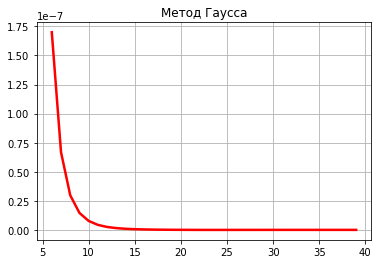

4.2518877307884395e-11

In [28]:
#Построение графика абсолютной погрешности метода Гаусса
n_k = []
err_k = []
for i in range(6, 40, 1):
    n_k.append(i)
    err_k.append(err_rate(exact_value2, gauss_rule(a, b, alpha, i, 3)))

plt.title('Метод Гаусса')
plt.plot(n_k, err_k, 'red', linewidth=2.5)
plt.grid()
plt.show()

err_rate(exact_value2, gauss_rule(a, b, alpha, 40, 3))

## Часть №2: Методы оценки погрешности составных квадратурных формул

In [29]:
eps = 10**(-6)
r = 2
L = 2
h = 0.8
R = 10
exact_value2 = 32.2195145288

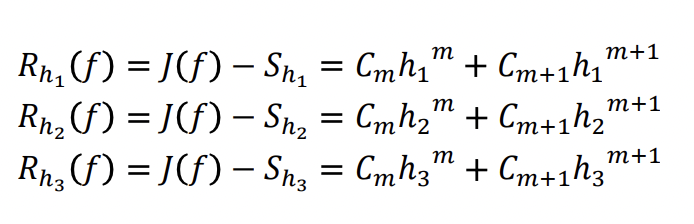
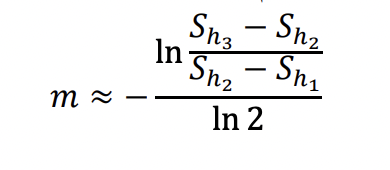

In [30]:
#Нахождение погрешности для метода Ричардсона
def find_Rn(h1, r, meth):
    h_i = []
    S_i = []
    R_i = []    
    
    #Использование метода Ньютона-Котса
    if meth == 1:
        for i in range(r+1):
            h_i.append(h1/(L**i))
            S_i.append(newton_cotes(a, b, alpha, round((b-a)/h_i[i]), 3))
    
    #Использование метода Гаусса
    if meth == 0:
        for i in range(r+1):
            h_i.append(h1/(L**i))
            S_i.append(gauss_rule(a, b, alpha, round((b-a)/h_i[i]), 3))
            
        
    #Определим порядок главного члена погрешности m
    m = -(np.log((S_i[-1]-S_i[-2])/(S_i[-2]-S_i[-3])))
    print("Значение m:", m)
        
    #Матрица коэффициентов
    A_i = []
    
    for i in range(r+1):
        A_i.append([-1])
        for j in range(r):
            A_i[i].append(h_i[i]**(m+j))
 
    B = [i*-1 for i in S_i]   
    sol = gaussian_elimin(A_i, B)
    
    for i in range(r+1):
        R_i.append(sol[0]-S_i[i])
    
    R = min([abs(i) for i in R_i])
    
    return R
    

In [31]:
#Метод Ричардсона
def rich_meth(R, h1, r, meth):
    while R > eps:
        R = find_Rn(h1, r, meth)
        print("Значение погрешности:", R)
        print("Значение r:", r)
        print("Шаг разбиения:", h1)
        print("")
        
        h1 = h1/2
        r+=1
        

In [32]:
h = 0.8
#Метод Ричардсона для метода Ньютона-Котса
print("Метод Ричардсона для метода Ньютона-Котса")
rich_meth(R, h, r, 1)

#Метод Ричардсона для метода Ньютона-Котса
print("Метод Ричардсона для метода Гаусса")
rich_meth(R, h, r, 0)

Метод Ричардсона для метода Ньютона-Котса
Значение m: 2.5482729493232004
Значение погрешности: 0.005470336011669019
Значение r: 2
Шаг разбиения: 0.8

Значение m: 2.66208005972204
Значение погрешности: 2.4918873165802324e-05
Значение r: 3
Шаг разбиения: 0.4

Значение m: 2.648763366170971
Значение погрешности: 1.308482140416345e-07
Значение r: 4
Шаг разбиения: 0.2

Метод Ричардсона для метода Гаусса
Значение m: 4.56192587822495
Значение погрешности: 3.6238059948345835e-06
Значение r: 2
Шаг разбиения: 0.8

Значение m: 4.208361242655369
Значение погрешности: 6.41342978724424e-10
Значение r: 3
Шаг разбиения: 0.4



## Использование оптимального шага 

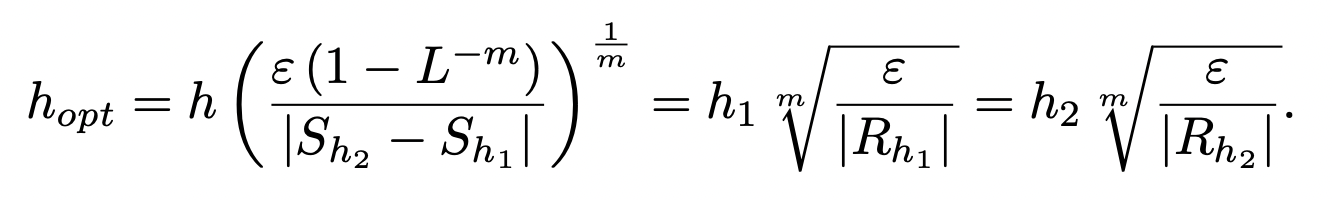

In [33]:
#Определение оптимального шага
def get_hopt(h1, r):
    h_i = []
    S_i = []
    R_i = []
    
    for i in range(r+1):
        h_i.append(h/(L**i))
        S_i.append(newton_cotes(a, b, alpha, round((b-a)/h_i[i]), 3))
            
        
    #Определим порядок главного члена погрешности m
    m = -(np.log((S_i[-1]-S_i[-2])/(S_i[-2]-S_i[-3])))
        
    #Определим оптимальный шаг разбиения
    hopt = h_i[0]*((eps*(1-L**(-m))/abs(S_i[1]-S_i[0])))**(1/m)
    
    return hopt

In [36]:
#Метод Ричардсона с оптимальным шагом
def rich_opt(R, h1, r, meth):
    print("Метод Ричардсона для метода Ньютона-Котса с оптимальным шагом") 
    hopt = get_hopt(h1, r)
    
    print("Найденный оптимальный шаг:", hopt)
    print("")
   
    while R > eps:
        R = find_Rn(hopt, r, meth)
        print("Значение погрешности:", R)
        print("Значение r:", r)
        print("Шаг разбиения:", hopt)
        print("")
        
        hopt = hopt/2
        r+=1
    

In [37]:
rich_opt(R, h, r, 1)

Метод Ричардсона для метода Ньютона-Котса с оптимальным шагом
Найденный оптимальный шаг: 0.0033327650280259636

Значение m: 2.639243148273676
Значение погрешности: 3.694822225952521e-12
Значение r: 2
Шаг разбиения: 0.0033327650280259636

